In [53]:
# import necessary lib
import matplotlib.pyplot as plt
import numpy as np
import operator as op

In [54]:
#Create an empty dictionary 
text_dict = {}

In [55]:
# Create list of Stop Words from a text file
s = open('STOPWORDS.txt', 'r')
stop_list = s.read().split()

In [56]:
# Open & read utf-8 file, convert string to list
with open('Story.txt', 'r', encoding='utf-8') as f:
    list1 = f.read().lower().split()

In [57]:
# Open & read utf-8 file, convert string to list
with open('Story.txt', 'r', encoding='utf-8') as f:
    list1 = f.read().lower().split()

In [58]:
# Remove punctuations from the list of text
list1 = [word.strip('.,;:?!\\|/$%&#+*@()_\=ufeff') for word in list1]

In [59]:
#remove stop words & count frequences of each word
for word in list1:
    if word not in stop_list:
        if word in text_dict:
            text_dict[word] += 1
        else:
            text_dict[word] = 1


In [60]:
#to get a list of tuples sorted by value
sort_list = sorted(text_dict.items(),
                   key=op.itemgetter(1), reverse=True)

In [61]:
#get first 10 words from sort_list
max_words = sort_list[:10]

In [62]:
# Get list of words from list of tuples
words = list(zip(*max_words)) [0]

In [63]:
#get frequences from list of tuples
frequency = list(zip(*max_words)) [1]

In [64]:
#to add zip function
nb = [1,2,3,4]
nb_name = ['one', 'two', 'three', 'four']

In [65]:
nb_zip_list = list(zip(nb_name, nb))
print(nb_zip_list)

[('one', 1), ('two', 2), ('three', 3), ('four', 4)]


In [66]:
#To get first tuple of name of numbers
name_list =list(zip(*nb_zip_list)) [0]

In [67]:
#to get second tuple of numbers
nb_list =list(zip(*nb_zip_list)) [1]
print(nb_list)

(1, 2, 3, 4)


In [68]:
#because list(zip(*nb_zip_list))
print(list(zip(*nb_zip_list)))

[('one', 'two', 'three', 'four'), (1, 2, 3, 4)]


In [69]:
#to get Y position
y_position = np.arange(len(words))

Text(0.5, 1.0, 'Words Frequences')

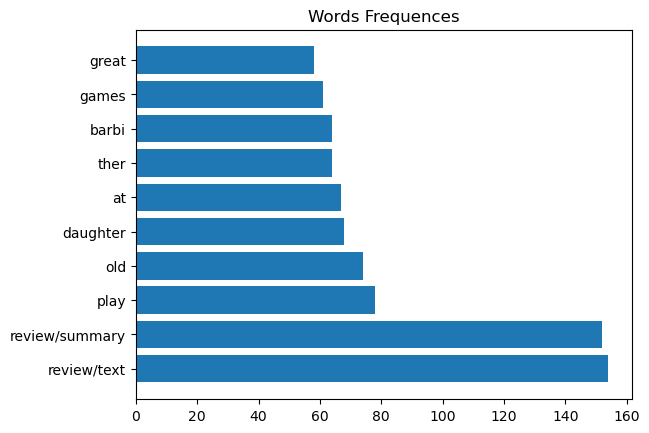

In [70]:
#create horizontal bar chart
plt.barh(y_position, frequency, align = 'center')
plt.yticks(y_position, words)
plt.title('Words Frequences')

In [19]:
from wordcloud import WordCloud

In [20]:
from wordcloud import WordCloud

ds = WordCloud(background_color='white', width=1000, height=1000, max_words=100).generate_from_frequencies(text_dict)

Text(0.5, 1.0, 'words Frequences2')

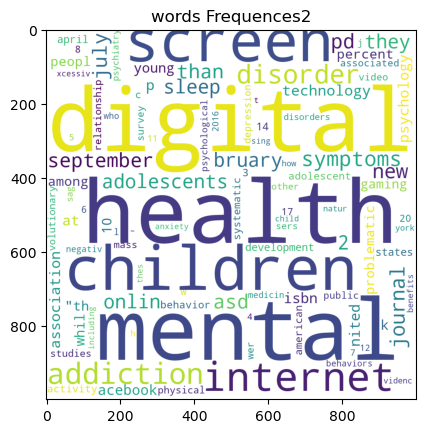

In [21]:
plt.imshow(ds)
plt.title('words Frequences2')

In [22]:
%pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [30]:
from textblob import TextBlob

In [33]:
with open('Story.txt', 'r', encoding='utf-8') as f:
    text = f.read()


In [35]:
from textblob import TextBlob

blob = TextBlob(text)
sentiment = blob.sentiment.polarity
print(sentiment)


0.04311694710807787


In [38]:
with open('story.txt', 'r', encoding='utf-8') as fh:
    reviews = fh.readlines()
print(reviews[:2])


['The relationships between digital media use and mental health have been investigated by various researchers—predominantly psychologists, sociologists, anthropologists, and medical experts—especially since the mid-1990s, after the growth of the World Wide Web. A significant body of research has explored "overuse" phenomena, commonly known as "digital addictions", or "digital dependencies". These phenomena manifest differently in many societies and cultures. Some experts have investigated the benefits of moderate digital media use in various domains, including in mental health, and the treatment of mental health problems with novel technological solutions.\n', '\n']


In [39]:
print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )
for review in reviews:
 #Find sentiment of a review
 sentiment = TextBlob(review)
 #Print individual sentiments
 print('{:40} : {: 01.2f} : {:01.2f}'.format(review[:40]\
 , sentiment.polarity, sentiment.subjectivity) )

Review                                   : Polarity   : Subjectivity
The relationships between digital media  :  0.01 : 0.30

                                        :  0.00 : 0.00
The delineation between beneficial and p : -0.07 : 0.21

                                        :  0.00 : 0.00
Digital media and screen time have chang :  0.00 : 0.22

                                        :  0.00 : 0.00
History and terminology
                 :  0.00 : 0.00
The relationship between digital technol :  0.04 : 0.16

                                        :  0.00 : 0.00
Terminologies used to refer to compulsiv :  0.04 : 0.26

                                        :  0.00 : 0.00
Internet addiction has been proposed as  : -0.01 : 0.35

                                        :  0.00 : 0.00
The Diagnostic and Statistical Manual of : -0.13 : 0.37

                                        :  0.00 : 0.00
The utility of the term addiction in rel : -0.07 : 0.45

                                  

In [40]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

In [41]:
#Categorize each review
for review in reviews:
 sentiment = TextBlob(review)
 
 #Custom formula to convert polarity 
 # 0 = (Negative) 1 = (Neutral) 2=(Positive)
 polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
 
 #add the summary array
 values[polarity] = values[polarity] + 1
 
print("Final summarized counts :", values)


Final summarized counts : [352, 81, 8]



 Pie Representation 
-------------------


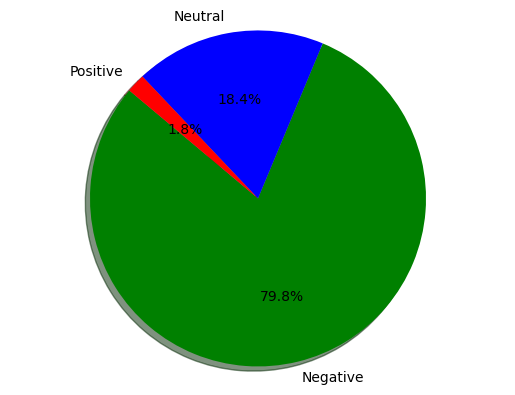

In [44]:
#Set colors by label
colors=["Green","Blue","Red"]
print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
 autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()